In [22]:
#Importing libraries
from scipy.io import arff
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from math import sqrt
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [23]:
#Importing dataset
data = arff.loadarff(r'C:\Users\Administrator\Downloads\ML project\chronic_kidney_disease.arff')
df=pd.DataFrame(data[0])


df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,b'1.020',b'1',b'0',b'?',b'normal',b'notpresent',b'notpresent',121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,b'yes',b'yes',b'no',b'good',b'no',b'no',b'ckd'
1,7.0,50.0,b'1.020',b'4',b'0',b'?',b'normal',b'notpresent',b'notpresent',NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
2,62.0,80.0,b'1.010',b'2',b'3',b'normal',b'normal',b'notpresent',b'notpresent',423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,b'no',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
4,51.0,80.0,b'1.010',b'2',b'0',b'normal',b'normal',b'notpresent',b'notpresent',106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,b'1.020',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'
396,42.0,70.0,b'1.025',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'
397,12.0,80.0,b'1.020',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'
398,17.0,60.0,b'1.025',b'0',b'0',b'normal',b'normal',b'notpresent',b'notpresent',114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,b'no',b'no',b'no',b'good',b'no',b'no',b'notckd'


In [24]:
X=df.shape[0]
Y=df.shape[1]
print("Number of rows",X,"\nNumber of columns",Y)

Number of rows 400 
Number of columns 25


In [25]:
per_ckd=df["class"][df["class"]=='ckd'].count()/X*100
per_non_ckd=100-per_ckd
print("Pourcentage of ckd : ",per_ckd,"%","\npourcentage of non_ckd : ",per_non_ckd,"%")


Pourcentage of ckd :  0.0 % 
pourcentage of non_ckd :  100.0 %


In [26]:
#we have 62.5% of the patients with ckd and 37.5% with no_ckd

In [27]:
#we must remove the b' in present in the sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class

In [28]:
#run only once
columns_to_decode=['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']
def fun_decode(columns,df):
    for col in columns :
        df[col]=df[col].str.decode('utf-8')
fun_decode(columns_to_decode,df)


In [29]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,?,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,?,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0,0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0,0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [30]:
df.dtypes

age      float64
bp       float64
sg        object
al        object
su        object
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [31]:
#we must convert sg to float and al,su to int

In [32]:
df=df.replace('?', np.nan)

In [33]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0,0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0,0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [34]:
df.dtypes

age      float64
bp       float64
sg        object
al        object
su        object
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [35]:
df["sg"] = df["sg"].astype(float)
df["al"] = df["al"].astype(float)
df["su"] = df["su"].astype(float)


In [36]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [37]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [38]:
print(df.isnull().sum())
df.isnull().sum().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


1012

In [39]:
#replacing the missing values with the mean for the numerical features
numeric_cols = df.columns[df.dtypes=="float64"].tolist()
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())


In [40]:
df.isnull().sum()

age        0
bp         0
sg         0
al         0
su         0
rbc      152
pc        65
pcc        4
ba         4
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv        0
wbcc       0
rbcc       0
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [41]:
object_cols=['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']

In [42]:
#data encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in object_cols:
    df[col]= label_encoder.fit_transform(df[col])

In [43]:
imputer = KNNImputer(n_neighbors=3)
imputer.fit(df)

KNNImputer(n_neighbors=3)

In [44]:
dataa = imputer.transform(df)

In [45]:
df = pd.DataFrame(dataa, index=df.index, columns=df.columns)

In [46]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,1.262500,0.972500,0.125000,0.075000,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.377500,0.352500,0.095000,0.210000,0.195000,0.15500,0.375000
std,16.974966,13.476298,0.005369,1.272318,1.029487,0.655491,0.593823,0.360138,0.299331,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.151081,2523.219976,0.840314,0.495588,0.488713,0.310186,0.413918,0.402965,0.36921,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,2.000000,1.000000,0.000000,0.000000,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000


In [47]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,2.0,1.0,0.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,2.0,1.0,0.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
#data encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in object_cols:
    df[col]= label_encoder.fit_transform(df[col])

In [49]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,0,0,0,0,0,0,1


In [50]:
#Features selection

<AxesSubplot:>

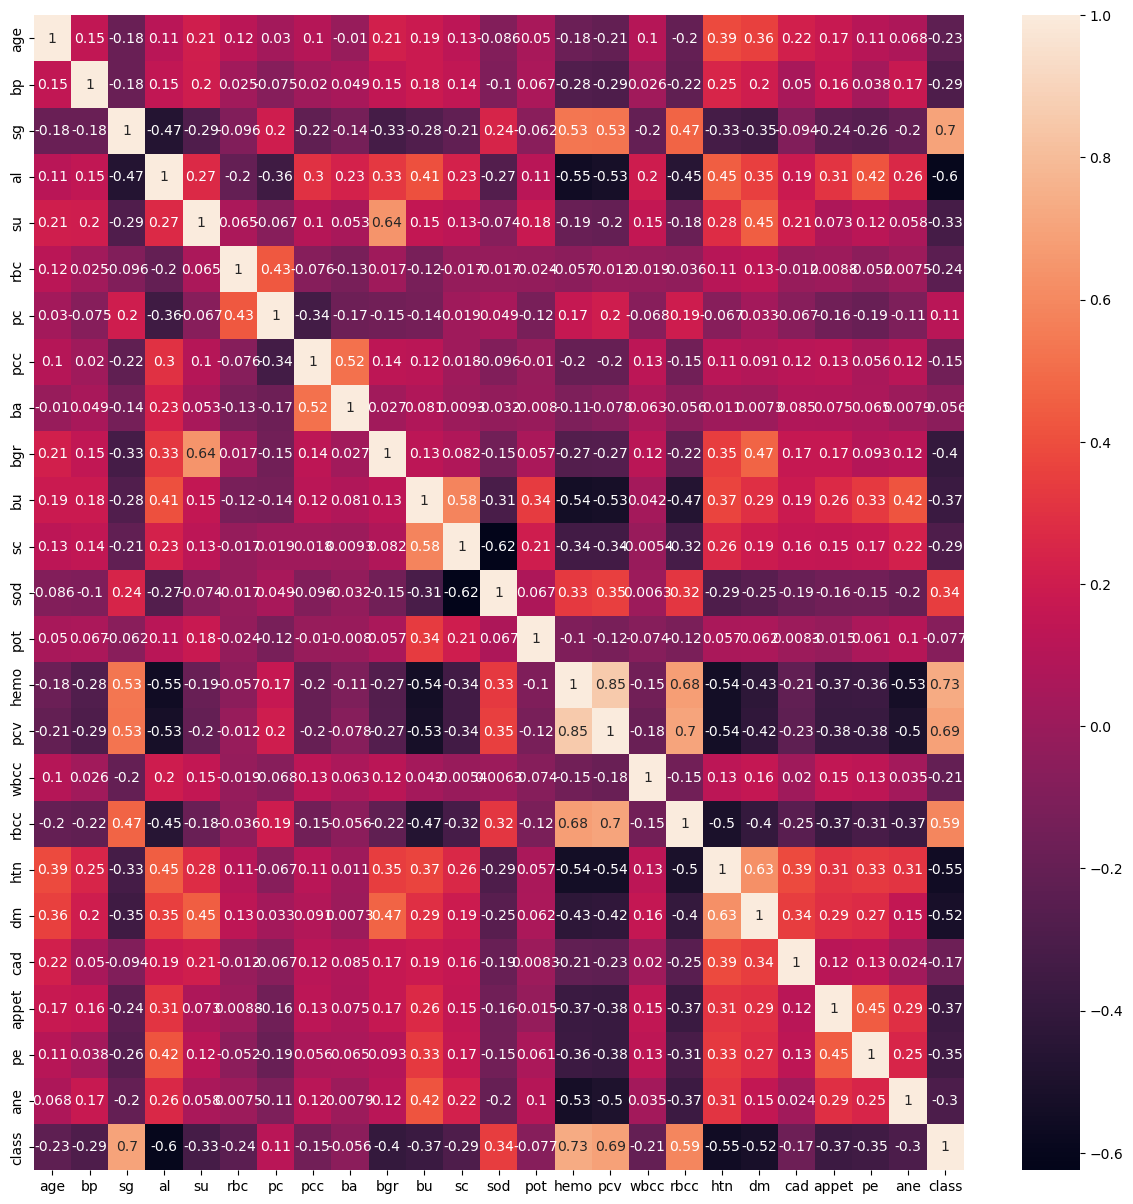

In [51]:
#corrolation matrix
import seaborn as sns
plt.figure(figsize=(15,15))
cor=df.corr()
sns.heatmap(cor,annot=True)

In [52]:
#input split
X=df.drop(columns=["class"],axis=1)
y=df["class"]


## Classification before CFS

In [53]:
# Splitting data into train and test datasetes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1024)

In [54]:
# Standardisation of data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [55]:
X_train

array([[0.64772727, 0.        , 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.88636364, 0.23076923, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.56231109, 0.15384615, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.54545455, 0.15384615, 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [0.78409091, 0.30769231, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.71590909, 0.07692308, 0.5       , ..., 1.        , 1.        ,
        0.        ]])

# kNN

In [56]:
# Grid Search for KNN

hyperparameters = {
    'leaf_size' : list(range(1,30)),
    'n_neighbors' : list(range(1,25)),
    'p' : [1,2]
}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=knn, param_grid=hyperparameters, cv=10, n_jobs=-1)

knn_cv.fit(X_train, y_train)

knn_cv.best_params_

{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}

In [57]:
knn = KNeighborsClassifier(leaf_size=1, p=1, n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=6, p=1)

In [58]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94        74
           1       0.85      0.98      0.91        46

    accuracy                           0.93       120
   macro avg       0.92      0.94      0.92       120
weighted avg       0.93      0.93      0.93       120



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## SVM

In [59]:
# Grid Search for SVM

hyperparameters = {
    'C': [1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}

svm = SVC()

svm_cv = GridSearchCV(estimator=svm, param_grid=hyperparameters, cv=10, n_jobs=-1)

svm_cv.fit(X_train, y_train)

svm_cv.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [60]:
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [61]:
y_pred_svc = svm.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        74
           1       0.98      0.98      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## Naive Bayes

In [62]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
y_pred_NB = naive_bayes.predict(X_test)
print(classification_report(y_pred_NB, y_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.96      0.85      0.90        52

    accuracy                           0.92       120
   macro avg       0.92      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



## Comparing scores before feature selection

In [63]:
#Defining precison score for each model
ps_svm=precision_score(y_test, y_pred_svc)
ps_knn=precision_score(y_test, y_pred_knn)
ps_nb=precision_score(y_test, y_pred_NB)

precision_score_List=[ps_svm,ps_knn,ps_nb]
#Defining recall for each model
recall_svm=recall_score(y_test, y_pred_svc)
recall_knn=recall_score(y_test, y_pred_knn)
recall_nb=recall_score(y_test, y_pred_NB)

recall_List=[recall_svm,recall_knn,recall_nb]
#Defining recall for each model
f1_score_svm=f1_score(y_pred_svc, y_pred_svc)
f1_score_knn=f1_score(y_pred_knn, y_pred_knn)
f1_score_nb=f1_score(y_test,y_pred_NB)

f1_score_List=[f1_score_svm,f1_score_knn,f1_score_nb]

In [64]:
Algorithm_Name_List=["SVM","KNN","Naive Bayes"]
metrics_List=["precison score","recall","f1-score"]

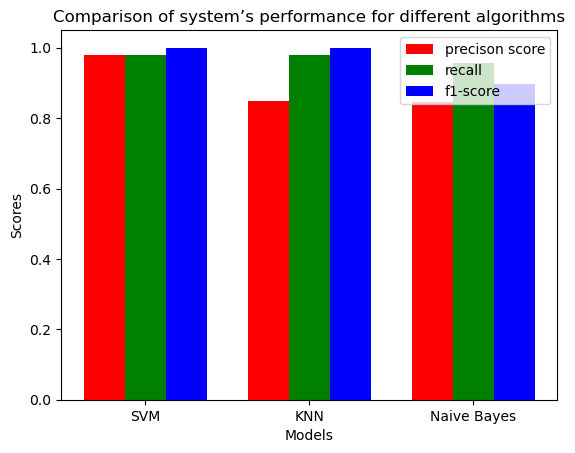

In [65]:
N = 3
ind = np.arange(N)
width = 0.25


bar1 = plt.bar(ind, precision_score_List, width, color = 'r')


bar2 = plt.bar(ind+width, recall_List, width, color='g')


bar3 = plt.bar(ind+width*2, f1_score_List, width, color = 'b')


plt.xlabel("Models")
plt.ylabel('Scores')
plt.title("Comparison of system’s performance for different algorithms")

plt.xticks(ind+width,Algorithm_Name_List)
plt.legend( (bar1, bar2, bar3), (metrics_List) )
plt.show()


In [66]:
#CFS

In [67]:
# Feature Selection using Correlation-based Feature Selection (CFS)
# Implementing CFS from scratch

# calculate the average feature-target correlation of a given target and a given subset of features 
def average_feature_target_correlation(data, subset, target):
    return abs(data.corr().loc[subset, [target]]).unstack().mean()

# calculate the average feature-feature correlation of a given subset of features 
def average_feature_feature_correlation(data, subset):
    # extract the upper triangular part of the correlation matrix
    upper_triangular_part_correlation_matrix = np.triu(data[subset].corr())
    # fill data below diagonal with NaN instead of 0
    upper_triangular_part_correlation_matrix[np.tril_indices(upper_triangular_part_correlation_matrix.shape[0], -1)] = np.NaN
    # fill the diagonal with NaN
    np.fill_diagonal(upper_triangular_part_correlation_matrix, np.NaN)
    # now calculate the average feature_feature correlation
    return np.nanmean(abs(upper_triangular_part_correlation_matrix))

# calculate the merit of a given subset of features
def SubsetMerit(data, subset, target):
    # the number of features in the subset
    k = len(subset)
    
    # average feature_target correlation
    avg_feat_targetCorr = average_feature_target_correlation(data, subset, target)
    
    # average feature_feature correlation
    avg_feat_featCorr = average_feature_feature_correlation(data, subset)

    return k * avg_feat_targetCorr / sqrt(k + k * (k - 1) * avg_feat_featCorr)

def CFS (data, target, k):
    # Initialisation
    
    # the search for most valuable features starts with an empty subset
    selected_features = []
    
    # then we evaluate for each feature the merit of being added to the empty subset
    # when k=1 (length of subset = 1) the feature-feature correlation can be neglected when calculating the merit
    # so in this iteration, the calculation of the merit is solely based on the feature-class correlation
    # because in this iteration we are evaluating the merit of each feature on its own (each feature is a subset of length 1) 
    # The feature with the highest feature-class correlation is added to the so far empty subset
    
    features = data.columns.tolist()
    features.remove(target)
    heighest_subset_merit = -1
    for feature in features:
        avg_feat_targetCorr = average_feature_target_correlation(data, [feature], target)
        if avg_feat_targetCorr > heighest_subset_merit :
            heighest_subset_merit = avg_feat_targetCorr
            selected_feature = feature
    selected_features.append(selected_feature)
    features.remove(selected_feature)
    
    # Iterations
    while len(selected_features)<k:
        subset = selected_features.copy()
        heighest_subset_merit = -1
        for feature in features:
            subset.append(feature)
            subset_merit = SubsetMerit(data, subset, target)
            if subset_merit > heighest_subset_merit:
                heighest_subset_merit = subset_merit
                selected_feature = feature
            subset.pop()
        selected_features.append(selected_feature)
        features.remove(selected_feature)
    return selected_features

In [68]:
selected_features = CFS(df, 'class', 17)
selected_features

['hemo',
 'sg',
 'al',
 'dm',
 'pcv',
 'rbc',
 'rbcc',
 'bgr',
 'bp',
 'sod',
 'appet',
 'htn',
 'wbcc',
 'pe',
 'su',
 'sc',
 'ane']

In [69]:
#bu,sc,pot different than the article

In [70]:
X =  df.drop(['class'], axis=1)
y = df["class"]

In [71]:
for feature in X.columns:
    if feature not in selected_features:
        X.drop(feature, axis=1, inplace=True)

In [72]:
#Classification

In [73]:
# Splitting data into train and test datasetes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1024)

In [74]:
# Standardisation of data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## KNN + CFS

In [75]:
# Grid Search for KNN

hyperparameters = {
    'leaf_size' : list(range(1,30)),
    'n_neighbors' : list(range(1,25)),
    'p' : [1,2]
}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=knn, param_grid=hyperparameters, cv=10, n_jobs=-1)

knn_cv.fit(X_train, y_train)

knn_cv.best_params_

{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}

In [76]:
knn = KNeighborsClassifier(leaf_size=1, p=1, n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=6, p=1)

In [77]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        74
           1       0.92      0.98      0.95        46

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## SVM + CFS

In [78]:
# Grid Search for SVM

hyperparameters = {
    'C': [1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}

svm = SVC()

svm_cv = GridSearchCV(estimator=svm, param_grid=hyperparameters, cv=10, n_jobs=-1)

svm_cv.fit(X_train, y_train)

svm_cv.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}

In [79]:
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [80]:
y_pred_svc = svm.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        74
           1       0.98      0.98      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## Naive Bayes + CFS

In [81]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
y_pred_NB = naive_bayes.predict(X_test)
print(classification_report(y_pred_NB, y_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.96      0.85      0.90        52

    accuracy                           0.92       120
   macro avg       0.92      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



## Comparing scores after feature selection

In [82]:
#Defining precison score for each model
ps_svm=precision_score(y_test, y_pred_svc)
ps_knn=precision_score(y_test, y_pred_knn)
ps_nb=precision_score(y_test, y_pred_NB)

precision_score_List=[ps_svm,ps_knn,ps_nb]
#Defining recall for each model
recall_svm=recall_score(y_test, y_pred_svc)
recall_knn=recall_score(y_test, y_pred_knn)
recall_nb=recall_score(y_test, y_pred_NB)

recall_List=[recall_svm,recall_knn,recall_nb]
#Defining recall for each model
f1_score_svm=f1_score(y_pred_svc, y_pred_svc)
f1_score_knn=f1_score(y_pred_knn, y_pred_knn)
f1_score_nb=f1_score(y_test,y_pred_NB)

f1_score_List=[f1_score_svm,f1_score_knn,f1_score_nb]

In [83]:
Algorithm_Name_List=["SVM","KNN","Naive Bayes"]
metrics_List=["precison score","recall","f1-score"]

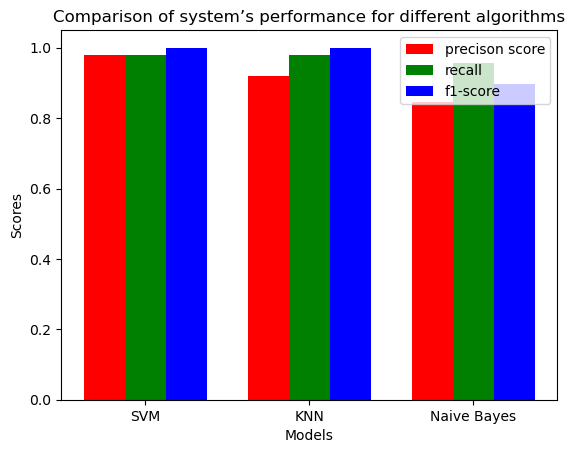

In [84]:
N = 3
ind = np.arange(N)
width = 0.25


bar1 = plt.bar(ind, precision_score_List, width, color = 'r')


bar2 = plt.bar(ind+width, recall_List, width, color='g')


bar3 = plt.bar(ind+width*2, f1_score_List, width, color = 'b')


plt.xlabel("Models")
plt.ylabel('Scores')
plt.title("Comparison of system’s performance for different algorithms")

plt.xticks(ind+width,Algorithm_Name_List)
plt.legend( (bar1, bar2, bar3), (metrics_List) )
plt.show()


## KNN + CFS + AdaBoost

In [87]:
knn=KNeighborsClassifier(leaf_size=1, p=1, n_neighbors=6)

svc=SVC(probability=True)

abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

model = abc.fit(X_train, y_train)

y_pred_svm_ada = model.predict(X_test)

print(classification_report(y_test, y_pred_svm_ada))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        74
           1       0.98      0.98      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## SVM + CFS + AdaBoost

In [86]:
svc=SVC(probability=True)

abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

model = abc.fit(X_train, y_train)

y_pred_svm_ada = model.predict(X_test)

print(classification_report(y_test, y_pred_svm_ada))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        74
           1       0.98      0.98      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## Naive Bayes + CFS + AdaBoost

In [88]:
NB_clf=MultinomialNB()

abc =AdaBoostClassifier(n_estimators=50, base_estimator=NB_clf,learning_rate=1)

model = abc.fit(X_train, y_train)

y_pred_NB_ada = model.predict(X_test)

print(classification_report(y_test, y_pred_NB_ada))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        74
           1       0.94      0.96      0.95        46

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [89]:
#Comparision of ther preformance of the used classification algorithms : SVM,KNN,Decision Trees, Random Forest

## Comparing scores after feature selection & AdaBoost

In [90]:
#Defining precison score for each model
ps_svm=precision_score(y_test, y_pred_svc)
ps_knn=precision_score(y_test, y_pred_knn)
ps_nb=precision_score(y_test, y_pred_NB)

precision_score_List=[ps_svm,ps_knn,ps_nb]
#Defining recall for each model
recall_svm=recall_score(y_test, y_pred_svc)
recall_knn=recall_score(y_test, y_pred_knn)
recall_nb=recall_score(y_test, y_pred_NB)

recall_List=[recall_svm,recall_knn,recall_nb]
#Defining recall for each model
f1_score_svm=f1_score(y_pred_svc, y_pred_svc)
f1_score_knn=f1_score(y_pred_knn, y_pred_knn)
f1_score_nb=f1_score(y_test,y_pred_NB)

f1_score_List=[f1_score_svm,f1_score_knn,f1_score_nb]

In [91]:
Algorithm_Name_List=["SVM","KNN","Naive Bayes"]
metrics_List=["precison score","recall","f1-score"]

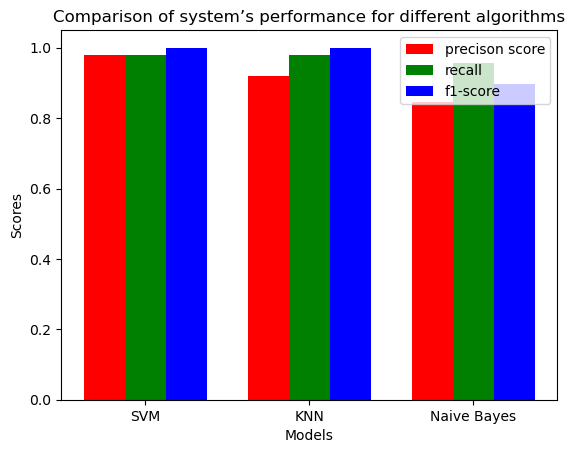

In [92]:
N = 3
ind = np.arange(N)
width = 0.25


bar1 = plt.bar(ind, precision_score_List, width, color = 'r')


bar2 = plt.bar(ind+width, recall_List, width, color='g')


bar3 = plt.bar(ind+width*2, f1_score_List, width, color = 'b')


plt.xlabel("Models")
plt.ylabel('Scores')
plt.title("Comparison of system’s performance for different algorithms")

plt.xticks(ind+width,Algorithm_Name_List)
plt.legend( (bar1, bar2, bar3), (metrics_List) )
plt.show()
